# Restaurant Revenue Prediction using Linear Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r"C:\Users\hp\Desktop\New folder (3)")

In [3]:
df=pd.read_csv("Restaurant.csv")

In [4]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [7]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [ ]:
#Exploratory Data Analysis(EDA)

In [8]:
df["Cuisine_Type"].value_counts()

Cuisine_Type
Japanese    262
American    256
Mexican     250
Italian     232
Name: count, dtype: int64

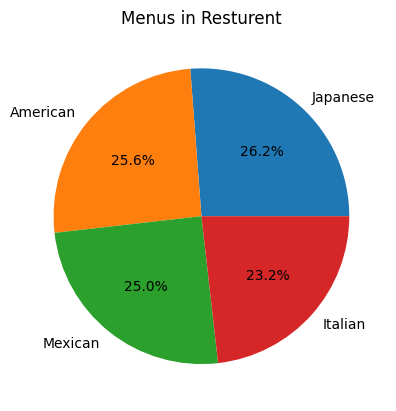

In [9]:
plt.pie(df["Cuisine_Type"].value_counts(),labels=(df["Cuisine_Type"].value_counts().keys()),autopct="%0.1f%%")
plt.title("Menus in Resturent")
plt.show()

In [10]:
df["Cuisine_Type"]

0      Japanese
1       Italian
2      Japanese
3       Italian
4       Italian
         ...   
995    Japanese
996     Mexican
997    Japanese
998    Japanese
999     Italian
Name: Cuisine_Type, Length: 1000, dtype: object

In [11]:
df["Menu_Price"]

0      43.117635
1      40.020077
2      41.981485
3      43.005307
4      17.456199
         ...    
995    41.307842
996    20.615496
997    17.110656
998    37.664722
999    34.722067
Name: Menu_Price, Length: 1000, dtype: float64

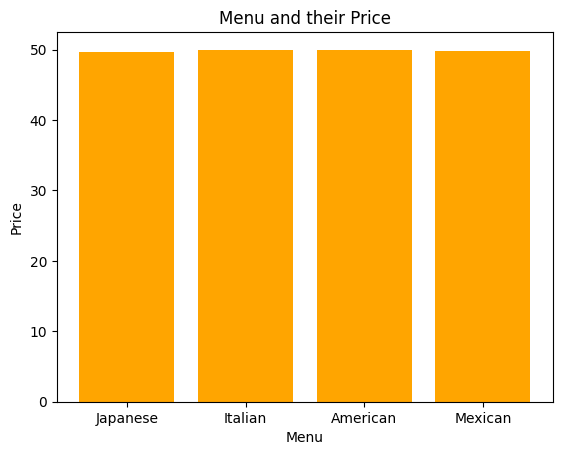

In [12]:
plt.bar(df["Cuisine_Type"],df["Menu_Price"],color=["orange"])
plt.xlabel("Menu")
plt.ylabel("Price")
plt.title("Menu and their Price")
plt.show()

In [13]:
df["Cuisine_Type"]

0      Japanese
1       Italian
2      Japanese
3       Italian
4       Italian
         ...   
995    Japanese
996     Mexican
997    Japanese
998    Japanese
999     Italian
Name: Cuisine_Type, Length: 1000, dtype: object

In [14]:
df["Monthly_Revenue"]

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    110.228767
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

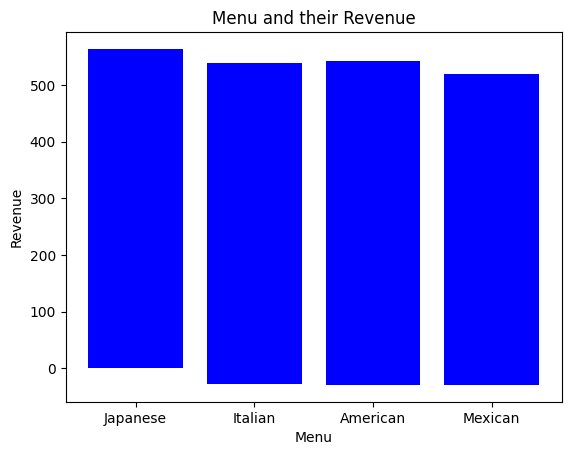

In [15]:
plt.bar(df["Cuisine_Type"],df["Monthly_Revenue"],color=["blue"])
plt.xlabel("Menu")
plt.ylabel("Revenue")
plt.title("Menu and their Revenue")
plt.show()

In [16]:
df["Cuisine_Type"]

0      Japanese
1       Italian
2      Japanese
3       Italian
4       Italian
         ...   
995    Japanese
996     Mexican
997    Japanese
998    Japanese
999     Italian
Name: Cuisine_Type, Length: 1000, dtype: object

In [17]:
df["Average_Customer_Spending"]

0      36.236133
1      17.952562
2      22.600420
3      18.984098
4      12.766143
         ...    
995    19.033585
996    17.040990
997    44.649315
998    27.767358
999    15.482112
Name: Average_Customer_Spending, Length: 1000, dtype: float64

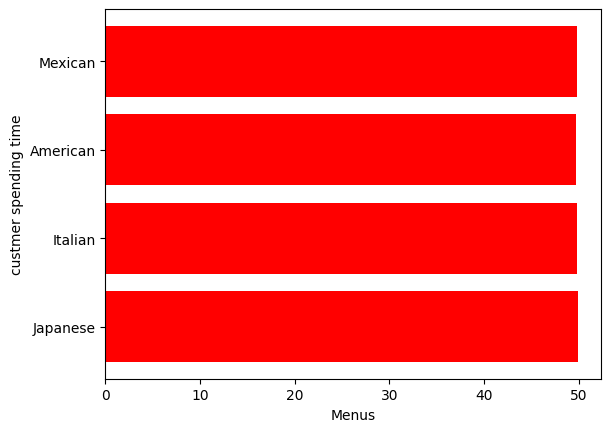

In [18]:
plt.barh(df["Cuisine_Type"],df["Average_Customer_Spending"],color=["red"])
plt.xlabel("Menus")
plt.ylabel("custmer spending time")
plt.show()

In [29]:
df.sort_values(by="Menu_Price",ascending=False).head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
289,44,49.974140,15.437155,Italian,44.350457,1,91,330.713819
33,71,49.907705,12.921802,American,38.576564,0,12,485.240271
382,85,49.853431,3.377084,Mexican,42.812964,1,61,374.160024


In [20]:
df.sort_values(by="Monthly_Revenue",ascending=False).head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
84,96,16.620820,16.610689,Japanese,12.284687,0,23,563.381332
894,92,23.342782,18.143996,American,23.433739,1,13,542.467282
729,83,41.820415,19.994276,Italian,39.634771,0,61,539.371604


In [34]:
df.sort_values(by="Reviews",ascending=False).head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
790,97,12.851211,15.251928,Japanese,17.026884,0,99,295.258914
642,30,35.301621,9.332156,Mexican,14.531984,1,99,51.269261
226,79,32.931775,16.027338,American,42.704935,1,99,262.777638


In [ ]:
#Predictive Analysis using Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [22]:
x=df[["Number_of_Customers","Menu_Price","Marketing_Spend","Average_Customer_Spending","Promotions","Reviews"]]

In [23]:
x

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews
0,61,43.117635,12.663793,36.236133,0,45
1,24,40.020077,4.577892,17.952562,0,36
2,81,41.981485,4.652911,22.600420,1,91
3,70,43.005307,4.416053,18.984098,1,59
4,30,17.456199,3.475052,12.766143,1,30
...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40
996,31,20.615496,5.822885,17.040990,0,57
997,69,17.110656,4.141898,44.649315,0,55
998,73,37.664722,3.046556,27.767358,0,23


In [24]:
y=df["Monthly_Revenue"]

In [25]:
y

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    110.228767
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
Lr=LinearRegression()

In [30]:
Lr.fit(x_train,y_train)

LinearRegression()

In [31]:
Lr.predict(x_test)

array([299.99098682, 337.96997342, 346.63366549, 314.19499518,
       211.48071563, 256.98965296, 186.67137291, 229.65108185,
       418.79895304, 393.65831287, 456.15932587, 328.18873803,
       242.91260511, 189.24678087, 241.24602846, 203.60846684,
       121.13099877, 192.69731736, 237.48193907, 301.71440055,
       268.66986655, 273.0156392 , 250.89181299, 126.81403015,
       314.93854909, 219.02264029, 333.43603164, 254.6560997 ,
       126.84906042, 165.59120644, 261.88484263, 262.73776841,
       321.58962407, 165.33102385, 338.56949186, 324.09527603,
       322.78322846, 248.07948015,  94.45305023, 301.056461  ,
       328.77296017, 152.43161401, 233.83625461,  81.19501317,
       256.74748233, 387.50923817, 366.48054172, 156.55724326,
       283.89702377, 424.47177686, 223.81066533, 235.65955206,
       341.02437802, 220.72501875, 227.68762188, 171.95577763,
       379.40900782, 425.18137819, 257.49714863, 408.37025758,
       418.42054657, 146.54854269, 437.31558729, 391.61

In [32]:
mse = mean_squared_error(y_test, Lr.predict(x_test))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3458.9300693224477


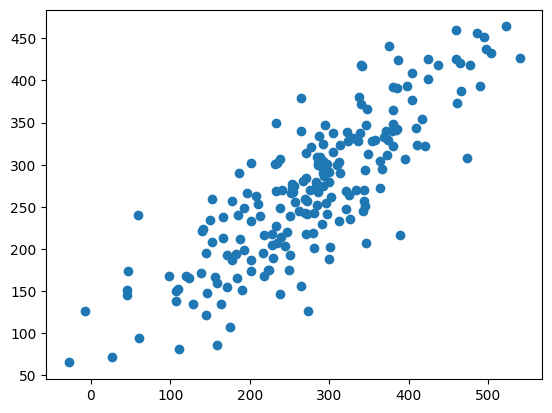

In [33]:
plt.scatter(y_test,Lr.predict(x_test) )
plt.show()